<a href="https://colab.research.google.com/github/barcygan/python/blob/master/koronawirus_mapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from urllib.request import urlopen
import pandas as pd
import json

with open('/content/powiaty.geojson') as response:
    counties = json.load(response)

import plotly.express as px

In [5]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/covid_powiaty11.xlsx")
df['analiza'] = 'powiat' + ' '+ df['Powiat/Miasto']
df1=df.groupby('analiza').sum().reset_index()


In [6]:
df['analiza'].to_excel('analzia.xls')

In [7]:
import plotly.express as px
import geopandas as gpd


geo = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/plik.geojson')


/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.



In [8]:
df.rename(columns={'analiza':'nazwa'},inplace=True)

In [9]:
geo_new = geo.merge(df,on='nazwa')

In [10]:
geo_new.sort_values(by='Liczba', ascending=False)

,id_x,nazwa,geometry,Województwo,Powiat/Miasto,Liczba,Liczba na 10 tys. mieszkańców,Wszystkie przypadki śmiertelne,Przypadki śmiertelne w wyniku Covid,Przypadki śmiertelne w wyniku chorób współistniejących,id_y
324,302,powiat Warszawa,"POLYGON ((20.91510 52.35400, 20.94360 52.36630...",mazowieckie,Warszawa,604,3.37,20,0,20,t1465
178,157,powiat Szczecin,"POLYGON ((14.77800 53.40300, 14.79030 53.39450...",zachodniopomorskie,Szczecin,327,8.15,6,0,6,t3262
126,110,powiat Łódź,"POLYGON ((19.33730 51.78410, 19.33660 51.82020...",łódzkie,Łódź,324,4.78,0,0,0,t1061
22,14,powiat Kraków,"POLYGON ((20.09620 50.11930, 20.14310 50.10650...",małopolskie,Kraków,285,3.65,12,10,2,t1261
40,33,powiat Wrocław,"POLYGON ((16.83070 51.11180, 16.83320 51.12430...",dolnośląskie,Wrocław,265,4.12,0,0,0,t0264
...,...,...,...,...,...,...,...,...,...,...,...
358,337,powiat przeworski,"POLYGON ((22.38140 50.08390, 22.41250 50.09050...",podkarpackie,przeworski,3,0.38,5,0,5,t1814
245,221,powiat proszowicki,"POLYGON ((20.56320 50.19970, 20.62400 50.20070...",małopolskie,proszowicki,2,0.46,4,0,4,t1214
192,168,powiat białobrzeski,"POLYGON ((21.12480 51.72790, 21.17610 51.73210...",mazowieckie,białobrzeski,2,0.60,0,0,0,t1401
74,61,powiat kamiennogórski,"POLYGON ((15.96200 50.89460, 15.98030 50.89530...",dolnośląskie,kamiennogórski,2,0.46,0,0,0,t0207


In [ ]:
geo_new 

In [11]:
pip install -U plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.13.0)


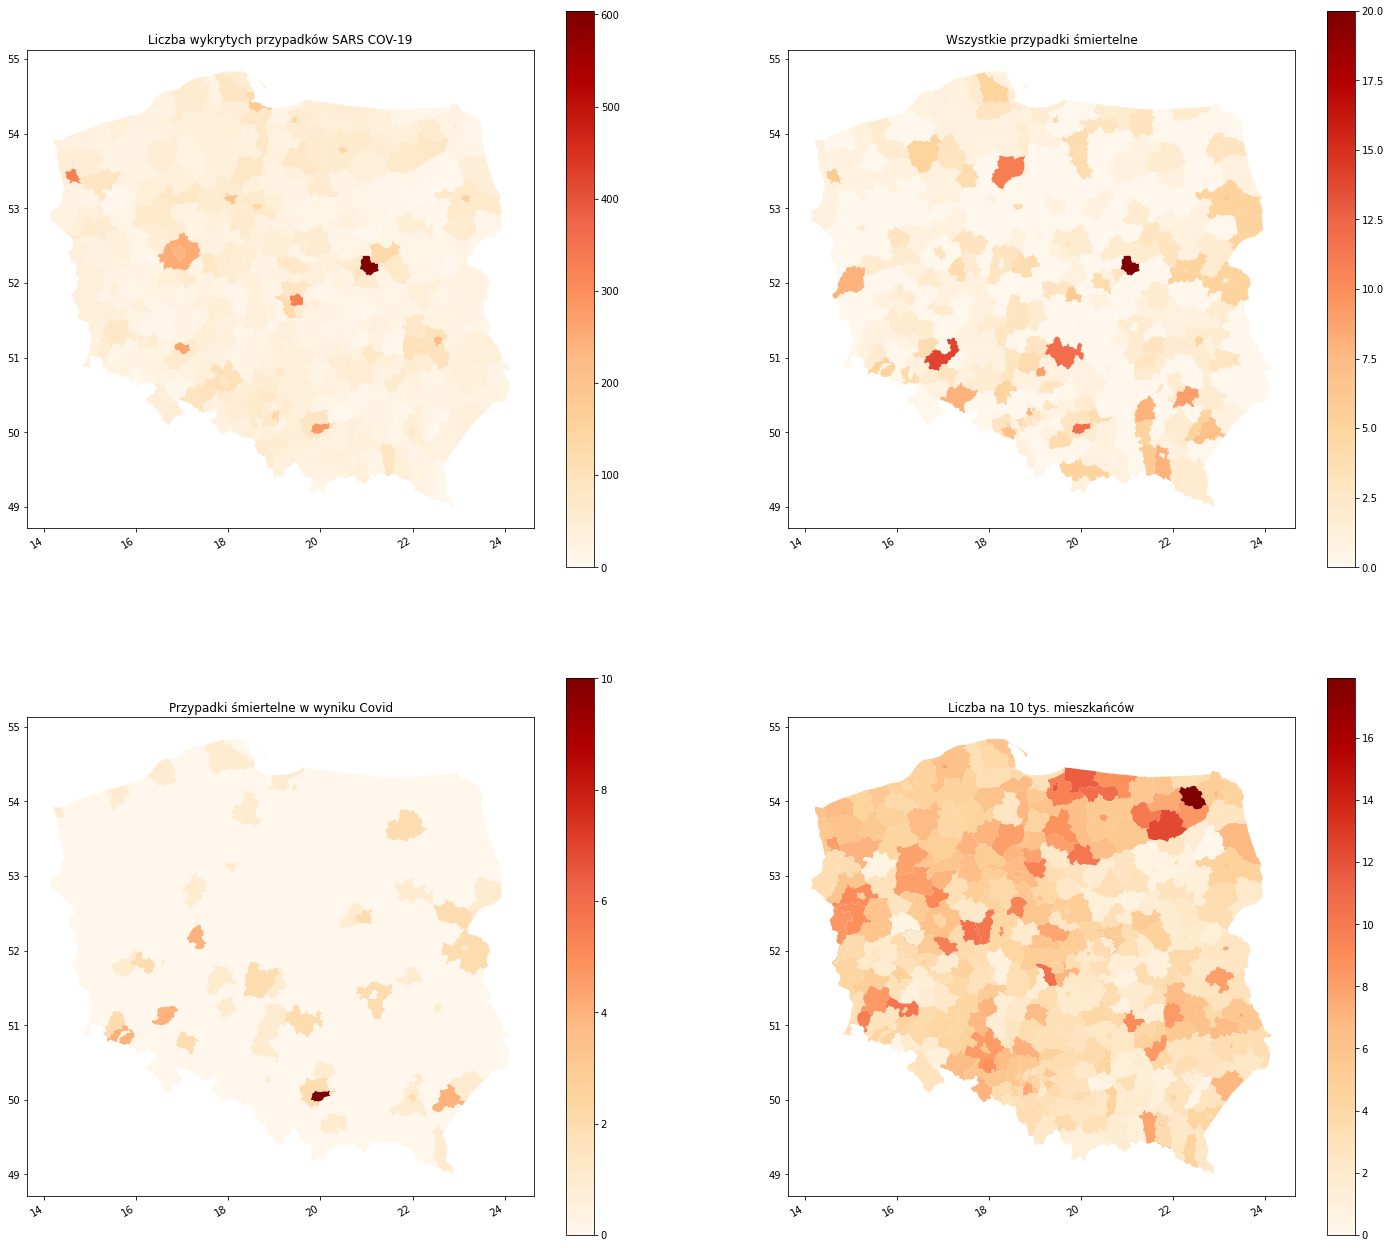

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25, 25), ncols=2, nrows=2)
ax[0][0].set_title('Liczba wykrytych przypadków SARS COV-19')

geo_new.plot(column='Liczba',ax=ax[0][0],legend=True,cmap='OrRd')
ax[0][1].set_title('Wszystkie przypadki śmiertelne')
geo_new.plot(column='Wszystkie przypadki śmiertelne',ax=ax[0][1],legend=True,cmap='OrRd')

ax[1][0].set_title('Przypadki śmiertelne w wyniku Covid')
geo_new.plot(column='Przypadki śmiertelne w wyniku Covid',ax=ax[1][0],legend=True,cmap='OrRd')

ax[1][1].set_title('Liczba na 10 tys. mieszkańców')
geo_new.plot(column='Liczba na 10 tys. mieszkańców',ax=ax[1][1],legend=True,cmap='OrRd')
#geo.boundary.plot()
fig.autofmt_xdate()


plt.savefig('costam.jpg')

#geo.plot(column=df['Liczba'])

In [109]:
import plotly.express as px
fig = px.choropleth(geo_new,
                   geojson=geo_new.geometry,
                   locations=geo_new.index,
                   color='Liczba',
                   projection="mollweide",
                   hover_name="nazwa",
                   labels={'Liczba':'Liczba wykrytych przypadków'},)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

plt.savefig('asd.jpg')

<Figure size 432x288 with 0 Axes>